# Markov Perfect Equilibrium


<a id='index-0'></a>

In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Diogo\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
import numpy as np
import quantecon as qe

# Parameters
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# In LQ form
A = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])


R1 = [[      0.,     -a0 / 2,          0.],
      [-a0 / 2.,          a1,     a1 / 2.],
      [       0,     a1 / 2.,          0.]]

R2 = [[     0.,           0.,      -a0 / 2],
      [     0.,           0.,      a1 / 2.],
      [-a0 / 2,      a1 / 2.,           a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# Solve using QE's nnash function
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1, 
                          Q2, S1, S2, W1, W2, M1, 
                          M2, beta=β)

# Display policies
print("Computed policies for firm 1 and firm 2:\n")
print(f"F1 = {F1}")
print(f"F2 = {F2}")
print("\n")

Computed policies for firm 1 and firm 2:

F1 = [[-0.66846615  0.29512482  0.07584666]]
F2 = [[-0.66846615  0.07584666  0.29512482]]




In [3]:
Λ1 = A - B2 @ F2
lq1 = qe.LQ(Q1, R1, Λ1, B1, beta=β)
P1_ih, F1_ih, d = lq1.stationary_values()
F1_ih

array([[-0.66846613,  0.29512482,  0.07584666]])

In [4]:
np.allclose(F1, F1_ih)

True

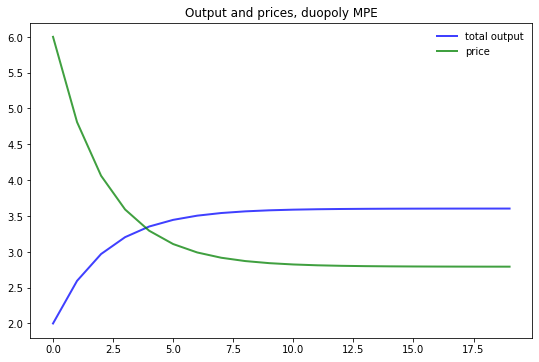

In [5]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

fig, ax = plt.subplots(figsize=(9, 5.8))
ax.plot(q, 'b-', lw=2, alpha=0.75, label='total output')
ax.plot(p, 'g-', lw=2, alpha=0.75, label='price')
ax.set_title('Output and prices, duopoly MPE')
ax.legend(frameon=False)
plt.show()

In [6]:
# == Parameters == #
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# == In LQ form == #
A  = np.eye(3)
B1 = np.array([[0.], [1.], [0.]])
B2 = np.array([[0.], [0.], [1.]])
R1 = [[      0.,      -a0/2,          0.],
      [-a0 / 2.,         a1,     a1 / 2.],
      [       0,    a1 / 2.,          0.]]

R2 = [[     0.,          0.,     -a0 / 2],
      [     0.,          0.,     a1 / 2.],
      [-a0 / 2,     a1 / 2.,          a1]]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# == Solve using QE's nnash function == #
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1, R2, Q1,
                          Q2, S1, S2, W1, W2, M1,
                          M2, beta=β)

In [7]:
AF = A - B1 @ F1 - B2 @ F2
n = 20
x = np.empty((3, n))
x[:, 0] = 1, 1, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
q1 = x[1, :]
q2 = x[2, :]
q = q1 + q2       # Total output, MPE
p = a0 - a1 * q   # Price, MPE

In [8]:
R = a1
Q = γ
A = B = 1
lq_alt = qe.LQ(Q, R, A, B, beta=β)
P, F, d = lq_alt.stationary_values()
q_bar = a0 / (2.0 * a1)
qm = np.empty(n)
qm[0] = 2
x0 = qm[0] - q_bar
x = x0
for i in range(1, n):
    x = A * x - B * F * x
    qm[i] = float(x) + q_bar
pm = a0 - a1 * qm

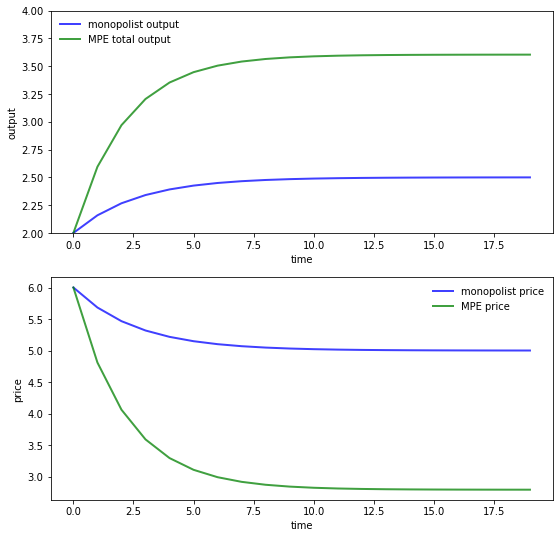

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

ax = axes[0]
ax.plot(qm, 'b-', lw=2, alpha=0.75, label='monopolist output')
ax.plot(q, 'g-', lw=2, alpha=0.75, label='MPE total output')
ax.set(ylabel="output", xlabel="time", ylim=(2, 4))
ax.legend(loc='upper left', frameon=0)

ax = axes[1]
ax.plot(pm, 'b-', lw=2, alpha=0.75, label='monopolist price')
ax.plot(p, 'g-', lw=2, alpha=0.75, label='MPE price')
ax.set(ylabel="price", xlabel="time")
ax.legend(loc='upper right', frameon=0)
plt.show()

In [10]:
δ = 0.02
D = np.array([[-1, 0.5], [0.5, -1]])
b = np.array([25, 25])
c1 = c2 = np.array([1, -2, 1])
e1 = e2 = np.array([10, 10, 3])

δ_1 = 1 - δ

In [11]:
# ==  Create matrices needed to compute the Nash feedback equilibrium == #

A = np.array([[δ_1,      0,    -δ_1 * b[0]],
              [  0,    δ_1,    -δ_1 * b[1]],
              [  0,      0,             1]])

B1 = δ_1 * np.array([[1, -D[0, 0]],
                     [0, -D[1, 0]],
                     [0,       0]])
B2 = δ_1 * np.array([[0, -D[0, 1]],
                     [1, -D[1, 1]],
                     [0,       0]])

R1 = -np.array([[0.5 * c1[2],     0,    0.5 * c1[1]],
                [          0,     0,              0],
                [0.5 * c1[1],     0,         c1[0]]])
R2 = -np.array([[0,               0,              0],
                [0,     0.5 * c2[2],    0.5 * c2[1]],
                [0,     0.5 * c2[1],         c2[0]]])

Q1 = np.array([[-0.5 * e1[2], 0], [0, D[0, 0]]])
Q2 = np.array([[-0.5 * e2[2], 0], [0, D[1, 1]]])

S1 = np.zeros((2, 2))
S2 = np.copy(S1)

W1 = np.array([[           0,             0],
               [           0,             0],
               [-0.5 * e1[1],    b[0] / 2.]])
W2 = np.array([[           0,             0],
               [           0,             0],
               [-0.5 * e2[1],    b[1] / 2.]])

M1 = np.array([[0, 0], [0, D[0, 1] / 2.]])
M2 = np.copy(M1)

In [12]:
F1, F2, P1, P2 = qe.nnash(A, B1, B2, R1,
                          R2, Q1, Q2, S1,
                          S2, W1, W2, M1, M2)

print("\nFirm 1's feedback rule:\n")
print(F1)

print("\nFirm 2's feedback rule:\n")
print(F2)


Firm 1's feedback rule:

[[ 2.43666582e-01  2.72360627e-02 -6.82788293e+00]
 [ 3.92370734e-01  1.39696451e-01 -3.77341073e+01]]

Firm 2's feedback rule:

[[ 2.72360627e-02  2.43666582e-01 -6.82788293e+00]
 [ 1.39696451e-01  3.92370734e-01 -3.77341073e+01]]


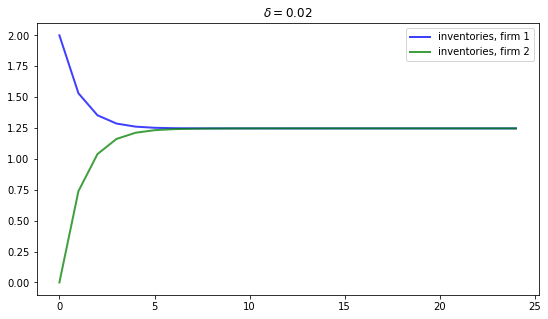

In [13]:
AF = A - B1 @ F1 - B2 @ F2
n = 25
x = np.empty((3, n))
x[:, 0] = 2, 0, 1
for t in range(n-1):
    x[:, t+1] = AF @ x[:, t]
I1 = x[0, :]
I2 = x[1, :]
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(I1, 'b-', lw=2, alpha=0.75, label='inventories, firm 1')
ax.plot(I2, 'g-', lw=2, alpha=0.75, label='inventories, firm 2')
ax.set_title(rf'$\delta = {δ}$')
ax.legend()
plt.show()